## Objective
* This is to demonstrate how Decision Tree (DT) model is applied to predict bike data
* Evaluate the accuracy of the model

## Work Flow
1. import the bike data and show the plot of data
2. create the training set
3. fit the model
4. add a grid search
5. find the best parameters
6. plot the prediction
7. plot the dendorgram

## Notes
[Bike sharing](https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset)
1. date
2. season
3. year
4. month
5. hour
6. holiday
7. weekday
8. workingday
9. weathersit
10. temperature in Celsius
11. feeling temperatue in Celsius
12. humidity
13. windspeed
14. number of casual users
15. number of registered users
16. number of total rental bikes

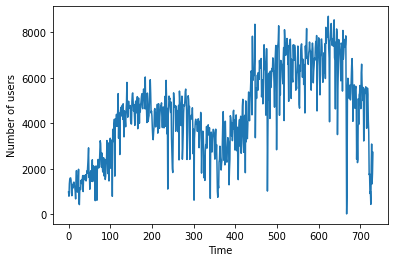

In [1]:
# step 12-1
# import bike-sharing data

import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('bikedata/day.csv')
ax = data['cnt'].plot()
ax.set_ylabel('Number of users')
ax.set_xlabel('Time')
plt.show()

In [2]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# step 12-2 => create the training set

# 7 last days of user count (autoregression)
data['usersL1'] = data['cnt'].shift(1)
data['usersL2'] = data['cnt'].shift(2)
data['usersL3'] = data['cnt'].shift(3)
data['usersL4'] = data['cnt'].shift(4)
data['usersL5'] = data['cnt'].shift(5)
data['usersL6'] = data['cnt'].shift(6)
data['usersL7'] = data['cnt'].shift(7)

# 7 last days of weathersit
data['weatherL1'] = data['weathersit'].shift(1)
data['weatherL2'] = data['weathersit'].shift(2)
data['weatherL3'] = data['weathersit'].shift(3)
data['weatherL4'] = data['weathersit'].shift(4)
data['weatherL5'] = data['weathersit'].shift(5)
data['weatherL6'] = data['weathersit'].shift(6)
data['weatherL7'] = data['weathersit'].shift(7)

# 7 last days of temperature
data['tempL1'] = data['temp'].shift(1)
data['tempL2'] = data['temp'].shift(2)
data['tempL3'] = data['temp'].shift(3)
data['tempL4'] = data['temp'].shift(4)
data['tempL5'] = data['temp'].shift(5)
data['tempL6'] = data['temp'].shift(6)
data['tempL7'] = data['temp'].shift(7)

# 7 last days of humidity
data['humL1'] = data['hum'].shift(1)
data['humL2'] = data['hum'].shift(2)
data['humL3'] = data['hum'].shift(3)
data['humL4'] = data['hum'].shift(4)
data['humL5'] = data['hum'].shift(5)
data['humL6'] = data['hum'].shift(6)
data['humL7'] = data['hum'].shift(7)

data = data.dropna()
data = data.drop(477)

X = data[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 
          'weatherL1', 'weatherL2', 'weatherL3', 'weatherL4', 'weatherL5', 'weatherL6', 'weatherL7',
         'usersL1','usersL2', 'usersL3', 'usersL4', 'usersL5', 'usersL6', 'usersL7',
         'tempL1', 'tempL2', 'tempL3', 'tempL4', 'tempL5', 'tempL6', 'tempL7',
         'humL1', 'humL2','humL3', 'humL4', 'humL5', 'humL6', 'humL7']]

y = data['cnt']

In [4]:
# step 12-3 => fit the model

# Create Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=12345, shuffle=False)

from sklearn.tree import DecisionTreeRegressor
my_dt = DecisionTreeRegressor(random_state=12345)
my_dt.fit(X_train, y_train)

from sklearn.metrics import r2_score
print(r2_score(list(y_test), list(my_dt.predict(X_test))))

0.16582718614044134


In [ ]:
# step 12-4 => add a grid search

from sklearn.model_selection import GridSearchCV

my_dt = GridSearchCV(DecisionTreeRegressor(random_state=44), 
                 {'min_samples_split': list(range(20,50, 2)),
                 'max_features': [0.6, 0.7, 0.8, 0.9, 1.],
                 'criterion': ['mse', 'mae']},
                scoring = 'r2', n_jobs = -1)

my_dt.fit(X_train, y_train)
print(r2_score(list(y_test), list(my_dt.predict(X_test))))

In [6]:
# step 12-5 => find the best parameters

print(my_dt.best_estimator_)

DecisionTreeRegressor(criterion='mae', max_features=0.8, min_samples_split=48,
                      random_state=44)


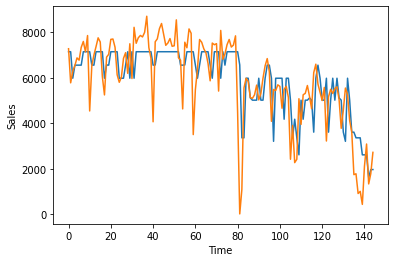

In [7]:
# step 12-6 => plot the prediction

fcst = my_dt.predict(X_test)

plt.plot(list(fcst))
plt.plot(list(y_test))
plt.ylabel('Sales')
plt.xlabel('Time')
plt.show()

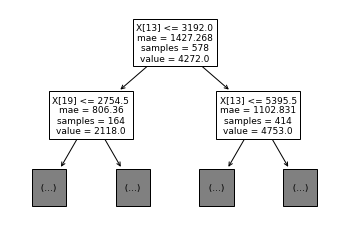

In [8]:
# step 12-7 => plot the dendorgram

from sklearn.tree import plot_tree
plot_tree(my_dt.best_estimator_, max_depth=1)
plt.show()